In [165]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from collections import Counter

In [231]:
X = np.array([[1.0, 1.1],
              [1.0, 1.0],
              [0.0, 0.0],
              [0.0, 0.1]])
y = np.array(['r', 'r', 'g', 'g'])

In [232]:
def distance(v, w, **kwargs):
    """
    Distance returns the distance between two vectors.
    The shorter the distance, the closer they are together.
    """
    v = np.array(v)
    w = np.array(w)
    return np.linalg.norm(v - w, **kwargs)

In [233]:
distance([0, 0], [1, 1]), distance([0, 0], [0.1, 0.1])

(1.4142135623730951, 0.14142135623730953)

In [234]:
def classify(X_i, X, y, k):
    distances = distance(X_i, X, axis=1)

    # Return the indices in the sorted order from lowest to highest.
    sorted_indices = distances.argsort()

    # Find the frequency of the nearest neighbors.
    counter = Counter(y[sorted_indices[:k]])
    
    # Find the ones with the highest score.
    return counter.most_common(1)[0][0]

In [235]:
classify(np.array([[0.0, 0.0]]), X, y, 2)

'g'

[[0.1 0.1]] is g
[[1.1 1.1]] is r


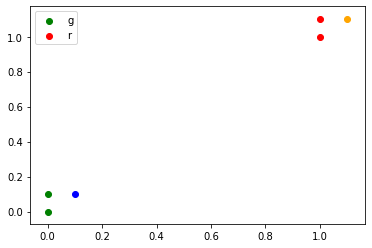

In [242]:
for cls in np.unique(y):
    X_y = X[y == cls]
    plt.scatter(X_y[:,0],
                X_y[:,1],
                color=cls,
                label=cls)

plt.legend()

X_t = np.array([[0.1, 0.1]])

plt.scatter(X_t[:, 0],
            X_t[:, 1],
            color='b',
            label='b')
print(X_t, 'is', classify(X_t, X, y, 2))

X_t = np.array([[1.1, 1.1]])
plt.scatter(X_t[:, 0],
            X_t[:, 1],
            color='orange',
            label='o')
print(X_t, 'is', classify(X_t, X, y, 2))

In [30]:
data_path = 'data/datingTestSet.txt'

X, y = [], []

with open(data_path, 'r') as f:
    for line in f:
        row = line.strip().split('\t')
        X.append([float(col) for col in row[:3]])
        y.append(row[3])
        
X, y = np.array(X), np.array(y)

In [65]:
features = ['number of frequent flyer miles earned per year',
            'percentage of time spent playing video games',
            'liters of ice-cream consumed per week']
classes = ['didntLike', # People she didn't like.
           'largeDoses', # People she liked in small doses.
           'smallDoses'] # People she liked in large doses.
X.shape, y.shape

((1000, 3), (1000,))

In [32]:
np.unique(y)

array(['didntLike', 'largeDoses', 'smallDoses'], dtype='<U10')

Text(0, 0.5, 'Liters of ice cream consumed per week')

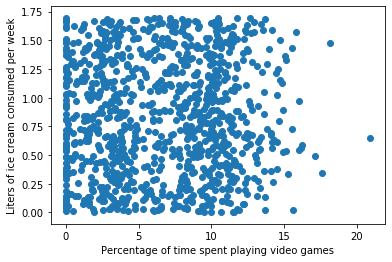

In [33]:
plt.scatter(X[:,1], 
            X[:,2])
plt.xlabel('Percentage of time spent playing video games')
plt.ylabel('Liters of ice cream consumed per week')

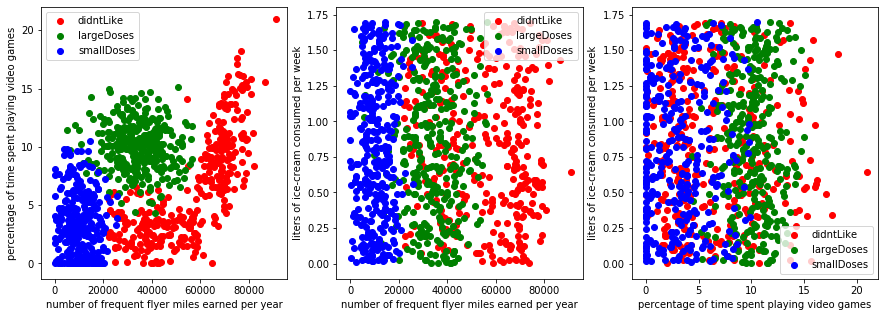

In [106]:
S = [0, 1, 2]
N_ROWS = 1
N_COLUMNS = len(S)

fig = plt.figure(figsize=(15, 5))

for i in S:
    for j in S[i+1:]:
        plt.subplot(N_ROWS, 
                    N_COLUMNS, 
                    i+j) # Position.
        for k, cls in enumerate(np.unique(y)):
            X_y = X[y == cls]
            plt.scatter(X_y[:, i], 
                        X_y[:, j], 
                        c='rgb'[k],
                        label=cls)
        plt.legend()
        plt.xlabel(features[i])
        plt.ylabel(features[j])

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [119]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [128]:
accuracy_score(y_test, y_pred)

0.93

In [162]:
frequent_flier_miles_earned_per_year = 10_000
time_spent_playing_video_games = 10
liters_of_ice_cream_consumed_per_year = 0.1

X_sample = [[frequent_flier_miles_earned_per_year,
             time_spent_playing_video_games,
             liters_of_ice_cream_consumed_per_year]]
X_sample_scaled = scaler.transform(X_sample)
clf.predict(X_sample_scaled)

array(['smallDoses'], dtype='<U10')

In [163]:
frequent_flier_miles_earned_per_year = 30_000
time_spent_playing_video_games = 10
liters_of_ice_cream_consumed_per_year = 0.1

X_sample = [[frequent_flier_miles_earned_per_year,
             time_spent_playing_video_games,
             liters_of_ice_cream_consumed_per_year]]
X_sample_scaled = scaler.transform(X_sample)
clf.predict(X_sample_scaled)

array(['largeDoses'], dtype='<U10')